In [1]:
using LaplaceRedux.Data
using Flux

using CSV
using DataFrames

using Random
Random.seed!(42)

df = CSV.read("data1.csv", DataFrame)
x = Matrix(df[:, 1:2])
x = [x[i, :] for i in 1:size(x, 1)]
y = df[:, 3]

# Prepare data for training
X = hcat(x...)
y_train = Flux.onehotbatch(y, unique(y[:, 1]))

[ Info: Precompiling LaplaceRedux [c52c1a26-f7c5-402b-80be-ba1e638ad478]
┌ Warning: The NVIDIA driver on this system only supports up to CUDA 11.1.0.
│ For performance reasons, it is recommended to upgrade to a driver that supports CUDA 11.2 or higher.
└ @ CUDA C:\Users\Lenovo\.julia\packages\CUDA\s0e3j\src\initialization.jl:70


4×100 OneHotMatrix(::Vector{UInt32}) with eltype Bool:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     1  1  1  1  1  1  1  1  1  1  1  1

In [2]:
data = zip(x,y_train)
n_hidden = 3
D = size(X,1)
out_dim = length(unique(y))
nn = Chain(
    Dense(D, n_hidden, σ),
    Dense(n_hidden, out_dim)
)  
loss(x, y) = Flux.Losses.logitcrossentropy(nn(x), y, dims = 1)

loss (generic function with 1 method)

In [3]:
using Flux.Optimise: update!, Adam
using Statistics
opt = Adam()
epochs = 5200
show_every = epochs/10

for epoch = 1:epochs
    loss_sum = 0
    
    gs = gradient(Flux.params(nn)) do
        loss(X, y_train)
    end
    update!(opt, Flux.params(nn), gs)
    
    loss_sum += loss(X, y_train)
    
    if epoch % show_every == 0
        println("Epoch ", epoch)
        println("Loss: ", loss_sum)
    end
end

Epoch 520
Loss: 1.0472287


┌ Warning: Layer with Float32 parameters got Float64 input.
│   The input will be converted, but any earlier layers may be very slow.
│   layer = Dense(2 => 3, σ)    # 9 parameters
│   summary(x) = "2×100 Matrix{Float64}"
└ @ Flux C:\Users\Lenovo\.julia\packages\Flux\FWgS0\src\layers\stateless.jl:50


Epoch 1040
Loss: 0.8439825
Epoch 1560
Loss: 0.755797
Epoch 2080
Loss: 0.55439997
Epoch 2600
Loss: 0.2914154
Epoch 3120
Loss: 0.18886778
Epoch 3640
Loss: 0.13264284
Epoch 4160
Loss: 0.097149715
Epoch 4680
Loss: 0.07298278
Epoch 5200
Loss: 0.055745345


In [4]:
using LaplaceRedux
la = Laplace(nn; likelihood=:classification)
fit!(la, data)
optimize_prior!(la; verbose=true, n_steps=1000)

[ Info: Iteration 100: P₀=0.08225227333929556, σ=1.0


loss(exp.(logP₀), exp.(logσ)) = 405.1209811189623
Log likelihood: -377.0415153503418
Log det ratio: 46.771425839664914
Scatter: 9.387505697576058
loss(exp.(logP₀), exp.(logσ)) = 405.12027068163866
Log likelihood: -377.0415153503418
Log det ratio: 46.61437134827802
Scatter: 9.54313931431568
loss(exp.(logP₀), exp.(logσ)) = 405.12027065937207
Log likelihood: -377.0415153503418
Log det ratio: 46.613494329603725
Scatter: 9.544016288456794


[ Info: Iteration 200: P₀=0.08361591765518193, σ=1.0
[ Info: Iteration 300: P₀=0.08362360160436826, σ=1.0
[ Info: Iteration 400: P₀=0.08362363892099171, σ=1.0


loss(exp.(logP₀), exp.(logσ)) = 405.12027065937156
Log likelihood: -377.0415153503418
Log det ratio: 46.61349007063213
Scatter: 9.544020547427413
loss(exp.(logP₀), exp.(logσ)) = 405.1202706593716
Log likelihood: -377.0415153503418
Log det ratio: 46.613490088172554
Scatter: 9.544020529887066
loss(exp.(logP₀), exp.(logσ)) = 

[ Info: Iteration 500: P₀=0.08362363876730518, σ=1.0
[ Info: Iteration 600: P₀=0.08362363876768338, σ=1.0


405.12027065937156
Log likelihood: -377.0415153503418
Log det ratio: 46.61349008812926
Scatter: 9.544020529930231
loss(exp.(logP₀), exp.(logσ)) = 405.12027065937144
Log likelihood: -377.0415153503418
Log det ratio: 46.6134900881297
Scatter: 9.544020529929599
loss(exp.(logP₀), exp.(logσ)) = 405.12027065937144
Log likelihood: -377.0415153503418
Log det ratio: 46.6134900881297
Scatter: 9.544020529929599
loss(exp.(logP₀), exp.(logσ)) = 405.12027065937144
Log likelihood: -377.0415153503418
Log det ratio: 46.6134900881297
Scatter: 9.544020529929599


[ Info: Iteration 700: P₀=0.08362363876767784, σ=1.0
[ Info: Iteration 800: P₀=0.08362363876767784, σ=1.0
[ Info: Iteration 900: P₀=0.08362363876767784, σ=1.0


loss(exp.(logP₀), exp.(logσ)) = 405.12027065937144
Log likelihood: -377.0415153503418
Log det ratio: 46.61349008812972
Scatter: 9.544020529929593


[ Info: Iteration 1000: P₀=0.0836236387676778, σ=1.0


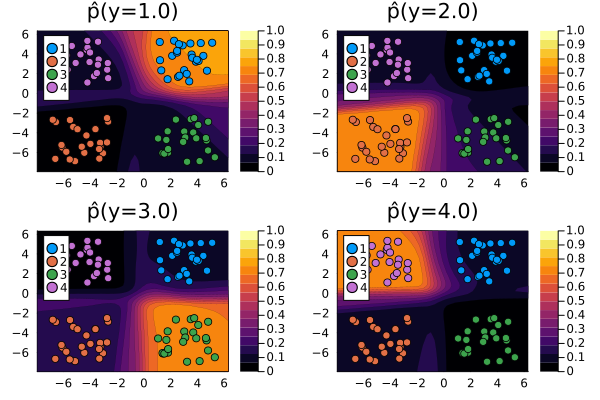

In [5]:
using Plots
_labels = sort(unique(y))
plt_list = []
for target in _labels
    plt = plot(la, X, y; target=target, clim=(0,1))
    push!(plt_list, plt)
end
plot(plt_list...)

In [6]:
predictions_probit = reduce(hcat, predict(la, X))
predictions_probit = reshape(predictions_probit, 4, 100)

[8.96233597479964 8.996750346873727 8.969131244174038 8.980370906729945 8.982749513207635 8.999153850102864 8.986439576081207 8.994146216987753 8.981964743765676 8.976208940817711 8.972910786987178 8.982912162362897 8.972368139728248 8.991664043863368 8.987490088245131 8.988566459806853 8.987660473353568 9.298756538722728 8.989334982443243 8.958781696230451 8.971676947243331 9.24302405505872 9.051936285336351 8.98924530948421 8.77852827502202 13.150162863315323 13.193619259815232 13.187484263373626 13.197778807834723 13.194797809944955 13.195219393851964 13.196801206186361 13.196872616306921 13.175787829319432 13.19477391878558 13.137083566620788 13.208839455867418 13.179172470386256 13.197610072458925 13.197718585642576 13.191567211949614 13.195333743045218 13.16889341833516 13.187542324775348 13.197745217136667 13.210422529434826 13.202673719802418 13.195128460360493 13.197769438178085 13.197836584902776 21.1096471154686 23.64942301292124 22.3211967818461 18.830466625288135 27.521097

4×100 Matrix{Float64}:
 0.750078   0.751921   0.744041  0.742612   …  0.0906381  0.102279   0.110153
 0.0253455  0.0250426  0.02616   0.0262528     0.119014   0.111166   0.10604
 0.112002   0.111833   0.114179  0.115577      0.0415734  0.0421555  0.042085
 0.112574   0.111203   0.11562   0.115557      0.748775   0.7444     0.741722

In [7]:
# Create a DataFrame with column names
df = DataFrame(class1=predictions_probit[1,:],
               class2=predictions_probit[2,:],
               class3=predictions_probit[3,:],
               class4=predictions_probit[4,:])

# Write table to CSV file
CSV.write("predictions1-Julia.csv", df)

"predictions1-Julia.csv"

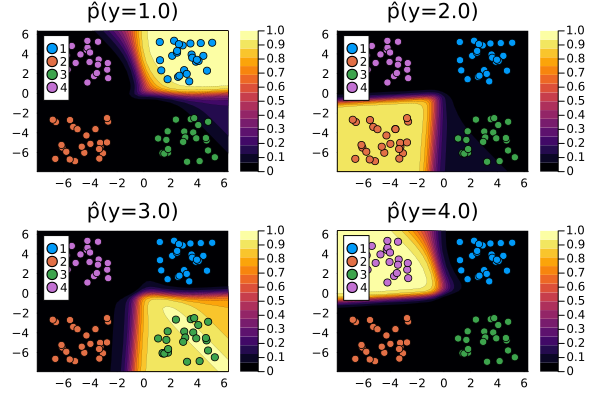

In [8]:
_labels = sort(unique(y))
plt_list = []
for target in _labels
    plt = plot(la, X, y; target=target, clim=(0,1), link_approx=:plugin)
    push!(plt_list, plt)
end
plot(plt_list...)

In [9]:
predictions_plugin = reduce(hcat, predict(la, X, link_approx=:plugin))
predictions_plugin = reshape(predictions_plugin, 4, 100)

[8.96233597479964 8.996750346873727 8.969131244174038 8.980370906729945 8.982749513207635 8.999153850102864 8.986439576081207 8.994146216987753 8.981964743765676 8.976208940817711 8.972910786987178 8.982912162362897 8.972368139728248 8.991664043863368 8.987490088245131 8.988566459806853 8.987660473353568 9.298756538722728 8.989334982443243 8.958781696230451 8.971676947243331 9.24302405505872 9.051936285336351 8.98924530948421 8.77852827502202 13.150162863315323 13.193619259815232 13.187484263373626 13.197778807834723 13.194797809944955 13.195219393851964 13.196801206186361 13.196872616306921 13.175787829319432 13.19477391878558 13.137083566620788 13.208839455867418 13.179172470386256 13.197610072458925 13.197718585642576 13.191567211949614 13.195333743045218 13.16889341833516 13.187542324775348 13.197745217136667 13.210422529434826 13.202673719802418 13.195128460360493 13.197769438178085 13.197836584902776 21.1096471154686 23.64942301292124 22.3211967818461 18.830466625288135 27.521097

4×100 Matrix{Float32}:
 0.965777    0.966675     0.963426     …  0.0097343    0.014748    0.0190655
 0.00014235  0.000135654  0.000157491     0.0209       0.0186685   0.0171294
 0.0169154   0.0167343    0.0178693       0.000939881  0.00108374  0.00114927
 0.0171656   0.0164548    0.0185476       0.968426     0.9655      0.962656